<div style='float: right'><img src='pic/nonogram.png'/></div>

## <div id='nonogram' />ノノグラム

### 問題
* 各横行の左、各縦列の上にある数字は、その行(列)の中で連続して黒く塗る白マスの数を表す
* 1つの行(列)に対して数字が複数ある場合は、数字の並び順どおりにその数字の数だけ連続して黒く塗る
* 1 つの行(列)に対して数字が複数ある場合は、その数字が表す黒マスの連続の間に1マス以上の白マス(塗らないマス) が入ります

### 定式化
\begin{array}{cl}
            変数 & v_{ij} \in \{0, 1\} ~ \forall i, j ~ ~ ~ マスi,jが黒かどうか (1) \\
                 & r_{k} \in \{0, 1\} ~ \forall k, 縦または横 ~ ~ ~ ~ ~ 縦または横ごとにk番目の候補を選ぶかどうか (2) \\
\mbox{subject to} & \sum_k{r_k} = 1 ~ \forall 縦または横 ~ ~ ~ ~ 縦または横ごとに候補の中から1つ (3) \\
                 & 候補を選んだらマスの色は候補の通り (4) \\
\end{array}

In [33]:
#!pip3 install pulp ortoolpy
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt
from pulp import LpProblem, lpSum, value
from ortoolpy import addvars, addbinvars

In [35]:
# 列に対してのヒント
hinth = [[int(s) for s in t.split(',')] for t in
         '3 2,2 1,1 2,2 3'.split()]
# 行に対してのヒント
hintv = [[int(s) for s in t.split(',')] for t in
         '3 2,2 1,1 2,2 3'.split()]

In [34]:
# # 列に対してのヒント
# hinth = [[int(s) for s in t.split(',')] for t in
#          '1,1 1,2,1 3,2 1,1,1,6 3,4 3,2 3,1,2,2 1,2,1,2,3 2,3,3,4 4,2,9 7,9 4,2,9 3,1,9 3,2,8 4,5,3 10,1 10 10 9 3'.split()]
# # 行に対してのヒント
# hintv = [[int(s) for s in t.split(',')] for t in
#          '1,6 1,8 1,10 3,3 3,1,1,1,3 15 8,5 7 1,9 12 6,4 8,3 2,7,3 2,1,6,3 4,6,2 3,6 9 7 3 4'.split()]

In [36]:
hinth

[[3], [2, 2], [1, 1], [2, 2], [3]]

In [37]:
hintv

[[3], [2, 2], [1, 1], [2, 2], [3]]

In [38]:
def baselist(i, j, k):
    return [0] * i + [1] * j + [0] * k
def makelist(n, l):
    p = l[-1]
    if len(l) == 1:
        if n < p: return None
        return [baselist(i, p, n - p - i) for i in range(n - p + 1)]
    ll = l[:-1]
    s = sum(ll) + len(ll) - 1
    return [j + baselist(1, p, n - p - s - i - 1) \
        for i in range(n - p - s) for j in makelist(i + s, ll)]
def do(m, v, hint):
    for i, hh in enumerate(hint):
        l = makelist(v.shape[0], hh)
        r = addbinvars(len(l)) # (2)
        m += lpSum(r) == 1 # (3)
        for j, c in enumerate(l):
            for k, b in enumerate(c):
                m += (1 - 2 * b) * v[k,i] <= 1 - b - r[j] # (4)
m = LpProblem()
v = np.array(addvars(len(hintv), len(hinth))) # (1)
do(m, v, hinth)
do(m, v.T, hintv)
m.solve()

1

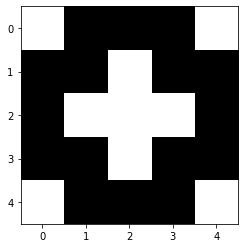

In [39]:
plt.imshow(1-np.vectorize(value)(v), cmap='gray', interpolation='none');